In [1]:
# Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cities_csv = os.path.join("data","cities.csv")

In [3]:
cities_df = pd.read_csv(cities_csv)
cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95
...,...,...,...,...,...,...,...,...,...,...
542,542,scalea,36,IT,1528905631,100,39.82,15.79,70.06,5.30
543,543,san andres,68,PH,1528905632,100,13.32,122.68,83.47,22.64
544,544,muisne,92,EC,1528905633,84,0.61,-80.02,76.90,4.63
545,545,ati,20,TD,1528905633,25,13.21,18.34,104.53,4.97


In [4]:
# I'm going to defint a function that will plot each of our desired comparisons
def Lat_vs_plot(y_values, units):
    
    # Start by establishing the figure size
    plt.figure(figsize=(16, 12))
    
    # Every plot has the Lat as the x-axis, and for fun, I will make each plot
    #  also have Lng as the colored z-axis to see if we can find any other relationships
    plt.scatter(cities_df[y_values], cities_df["Lat"], 
                edgecolors="black", s=100, alpha=0.6, c=cities_df['Lng'])
    
    # This will create a title with the date of which you run your data collection
    plt.title(f"City Latitude vs. {y_values}", size=20)
    
    # All of the other typical labels, limits, and saving the figure
    plt.ylabel("Latitude", size=16)
    plt.xlabel(f"{y_values} ({units})", size=16)
    cb = plt.colorbar()
    cb.set_label(label='Longitude', size=16)
    plt.ylim(-90,90)
    plt.grid (b=True, which="major", axis="both", color="lightgrey")
    plt.savefig(f"plots/Lat_vs_{y_values}.png", bbox_inches='tight')
    plt.show()

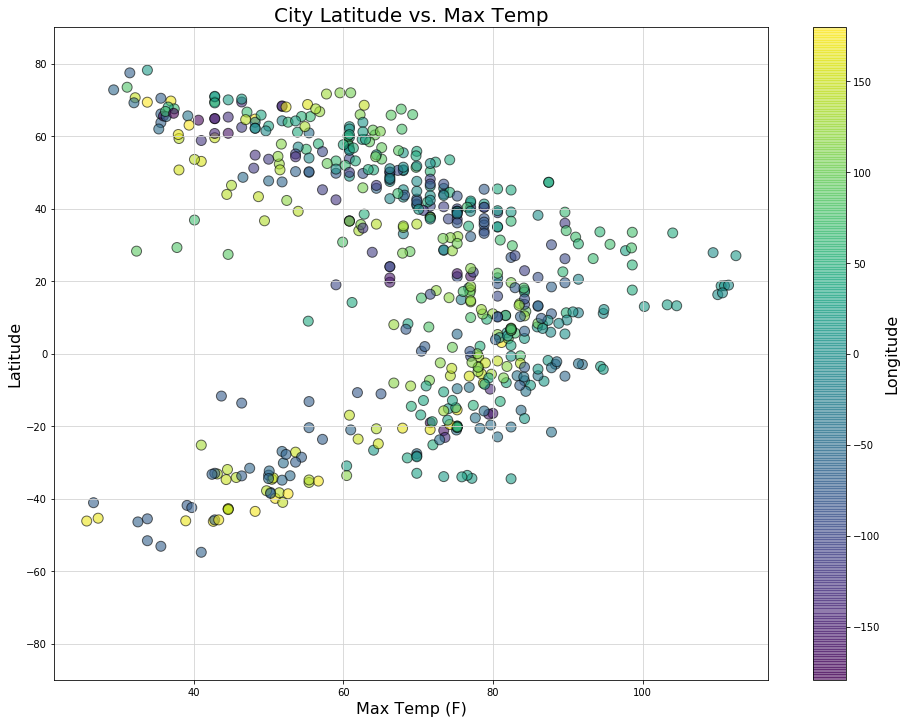

In [5]:
Lat_vs_plot('Max Temp', 'F')

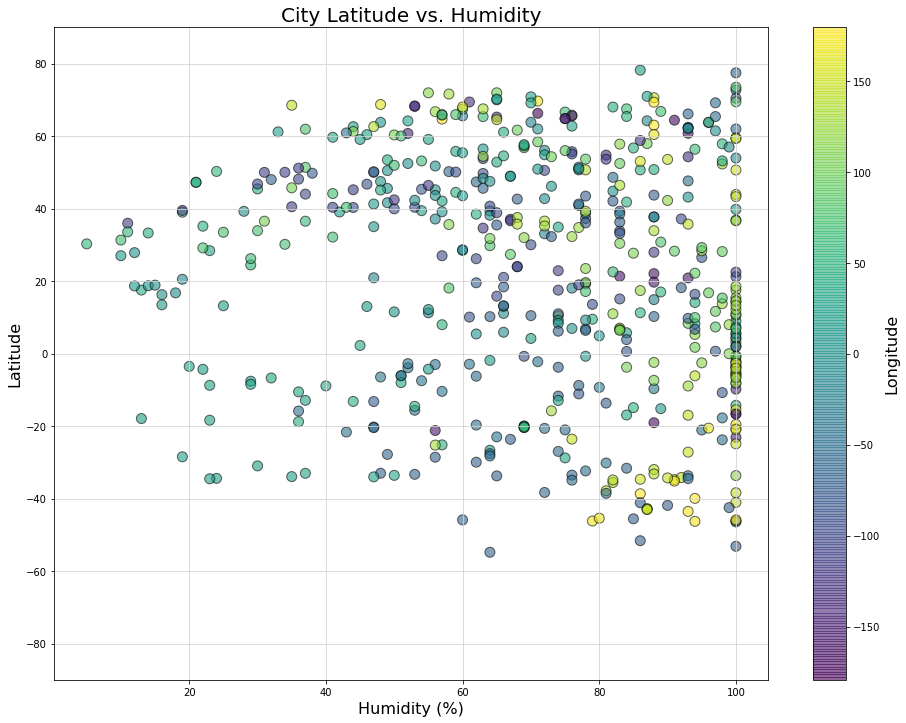

In [6]:
Lat_vs_plot('Humidity', '%')

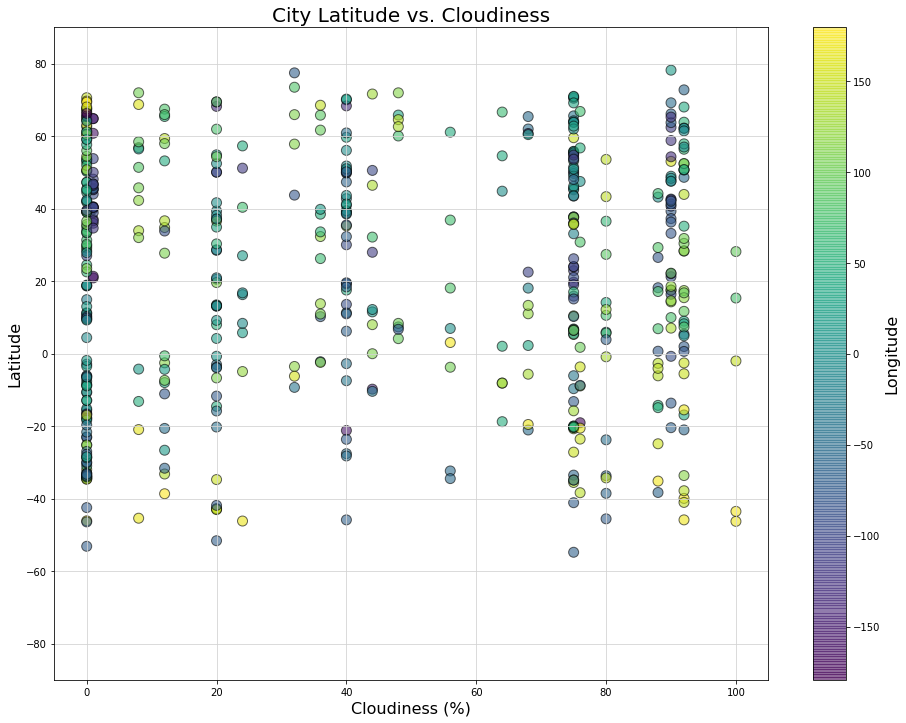

In [7]:
Lat_vs_plot('Cloudiness', '%')

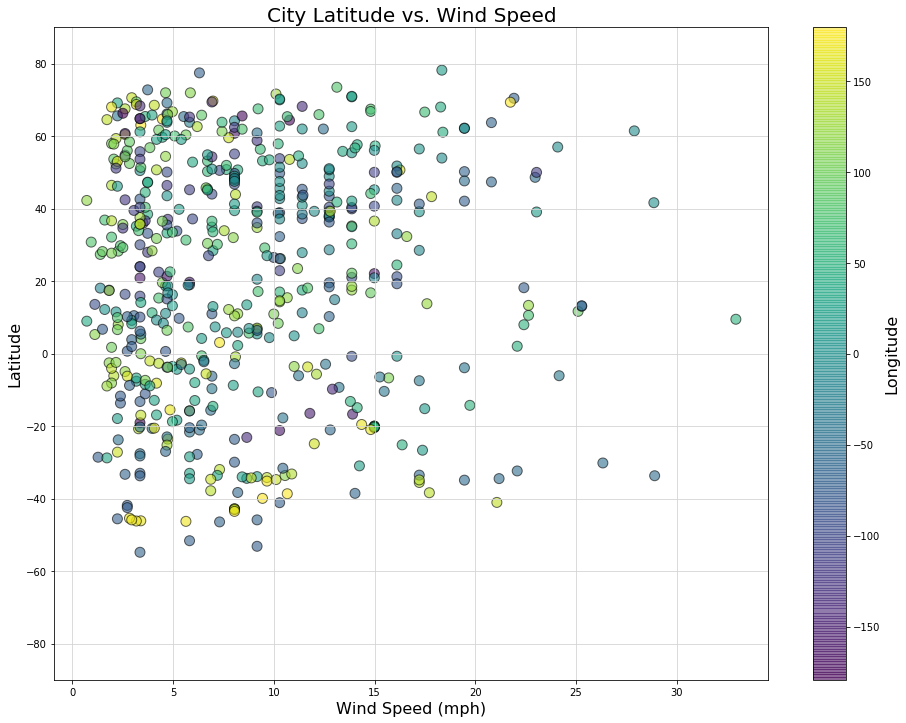

In [8]:
Lat_vs_plot('Wind Speed', 'mph')

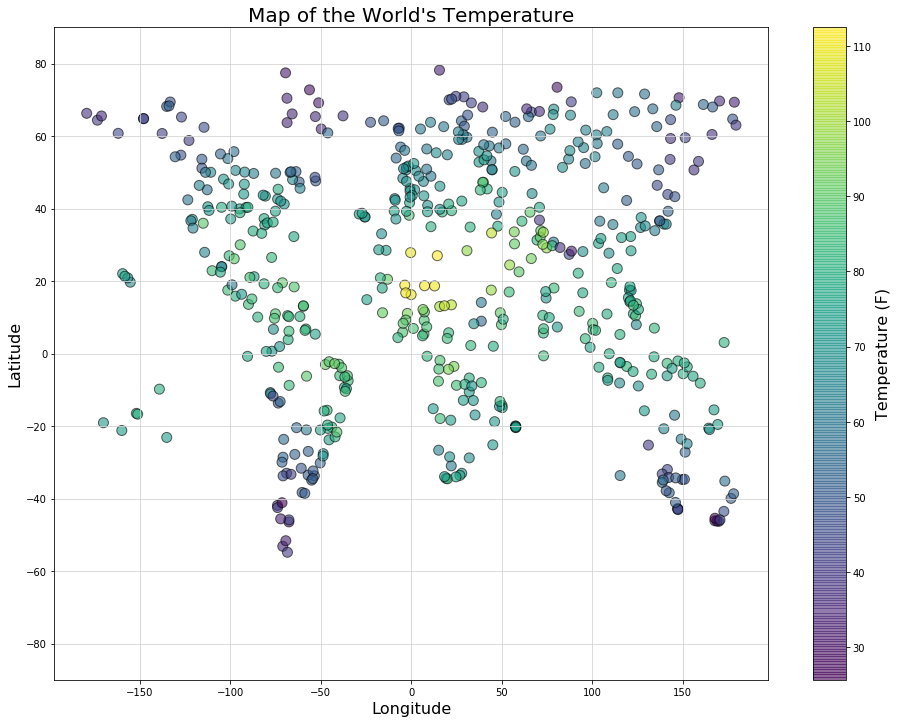

In [9]:
# Start by establishing the figure size
plt.figure(figsize=(16, 12))

# Every plot has the Lat as the x-axis, and for fun, I will make each plot
#  also have Lng as the colored z-axis to see if we can find any other relationships
plt.scatter(cities_df['Lng'], cities_df["Lat"], 
            edgecolors="black", s=100, alpha=0.6, c=cities_df['Max Temp'])

# This will create a title with the date of which you run your data collection
plt.title(f"Map of the World's Temperature", size=20)

# All of the other typical labels, limits, and saving the figure
plt.ylabel("Latitude", size=16)
plt.xlabel("Longitude", size=16)
cb = plt.colorbar()
cb.set_label(label='Temperature (F)', size=16)
plt.ylim(-90,90)
plt.grid (b=True, which="major", axis="both", color="lightgrey")
plt.savefig(f"plots/World_Map.png", bbox_inches='tight')
plt.show()

In [10]:
# And finally we will export our data in HTML so we can publish it online
cities_html = cities_df.to_html('cities_data.html', index=False, classes=['table', 'table-striped', 'table-hover'])